In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## **Climate Data Analysis**

In [68]:
daily_df = pd.read_csv('../data/raw/daily.csv')

daily_df['date'] = pd.to_datetime(daily_df['date'])

daily_df['Month'] = daily_df['date'].dt.month
daily_df['Year'] = daily_df['date'].dt.year

daily_df.drop(['date'], axis=1, inplace=True)

daily_grp = daily_df.groupby(['Year', 'Month']).mean()
daily_grp.head(5)

temperature_2m_max  temperature_2m_min  temperature_2m_mean
Year Month                                                             
2020 1               30.875129           24.955774            27.578622
     2               31.521069           25.127966            27.864459
     3               31.488033           24.994484            27.755101
     4               32.662334           26.312334            28.986221
     5               33.817065           27.197710            29.918542

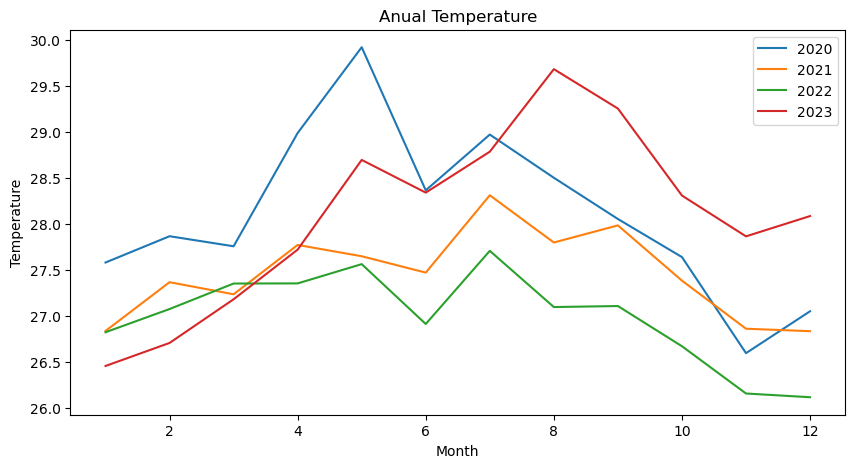

In [74]:
plt.figure(figsize=(10, 5))

for year in daily_grp.index.levels[0]:
    if year == 2024:
        break
    daily_grp.loc[year]['temperature_2m_mean'].plot(label=f'{year}')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Anual Temperature')
plt.legend()
plt.show()

In [59]:
hourly_df = pd.read_csv('../data/raw/hourly.csv')

hourly_df['date'] = pd.to_datetime(hourly_df['date'])

hourly_df['Year'] = hourly_df['date'].dt.year
hourly_df['Hour'] = hourly_df['date'].dt.hour

hourly_df.drop(['date'], axis=1, inplace=True)

hourly_grp = hourly_df.groupby(by=['Year', 'Hour']).mean()
hourly_grp.head(5)

temperature_2m  relative_humidity_2m  pressure_msl
Year Hour                                                    
2020 0          28.293932             76.411149   1009.824658
     1          28.039000             77.971235   1010.598082
     2          27.739274             79.438176   1011.166027
     3          27.454480             80.504380   1011.498904
     4          27.169519             81.474200   1011.487705

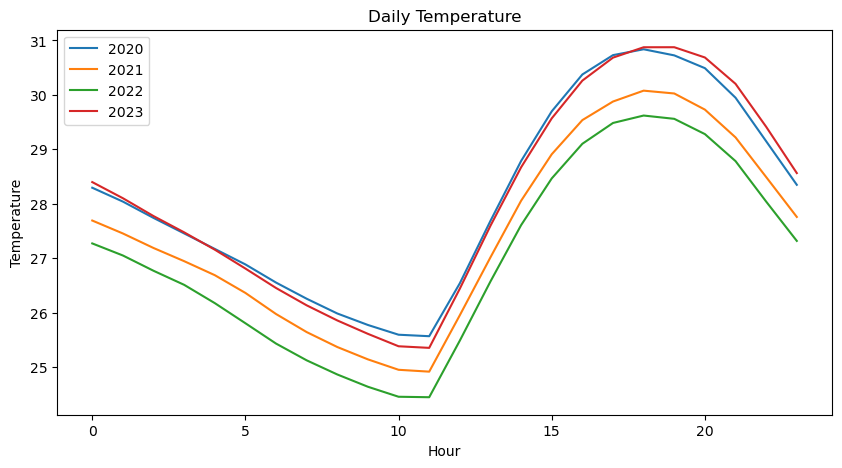

In [58]:
plt.figure(figsize=(10, 5))

for year in hourly_grp.index.levels[0]:
    if year == 2024:
        break
    hourly_grp.loc[year]['temperature_2m'].plot(label=f'{year}')

plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Daily Temperature')
plt.legend()
plt.show()


## **Data Processing**

In [3]:
processed_hourly_df = pd.read_csv('../data/raw/hourly.csv')

# Change column names to match the other datasets

processed_hourly_df.rename(columns={'temperature_2m':'T', 'relative_humidity_2m':'RH', 'pressure_msl':'Pbar'}, inplace=True)

# Convert Celsius to Fahrenheit

processed_hourly_df['T'] = (processed_hourly_df['T'] * 9/5) + 32

# Convert hPa to psia

processed_hourly_df['Pbar'] = processed_hourly_df['Pbar'] * (0.0145038)

# Add columns for inlet and outlet pressures (in inH2O)
# Values used for typical GE 7EA gas turbine

processed_hourly_df['dPin'] = 3.2    
processed_hourly_df['dPout'] = 2.2  

# Save the processed data

processed_hourly_df.to_csv('../data/processed/processed_hourly.csv', index=False)

processed_hourly_df.head(5)

,date,T,RH,Pbar,dPin,dPout
0,2020-01-01 04:00:00+00:00,79.896202,78.48717,14.679296,3.2,2.2
1,2020-01-01 05:00:00+00:00,79.446202,81.11546,14.674945,3.2,2.2
2,2020-01-01 06:00:00+00:00,78.996202,81.57719,14.666243,3.2,2.2
3,2020-01-01 07:00:00+00:00,78.636200,80.07795,14.658991,3.2,2.2
4,2020-01-01 08:00:00+00:00,78.186200,77.39832,14.657540,3.2,2.2
